In [1]:
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.util import ngrams

from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
import pickle
import json
from NLPPipe import NLPPipe

from nltk.corpus import stopwords
from cleaner_funcs import clean
from NLPPipe import NLPPipe

import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import collections

from textblob import TextBlob
from cleaner_funcs import clean, clean_text_string
from sklearn.feature_extraction import text
from helpers import top_features, add_stopwords

import csv
from cleaner_funcs import clean_list
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

In [2]:
with open('combined_2000.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [3]:
comms = []

for thread in data:
    for comment in thread['comments']:
        comms.append(comment['comment'])

In [4]:
corpus = comms

In [5]:
my_stop_words = list(text.ENGLISH_STOP_WORDS.union(["book"]))

In [143]:
words_to_del = ['ve', 'thi', 'wa', 'like', 'year','just', 'know', 'good', 'don', 'ani', 'want', 'realli', 'veri',
                'ha', 'thank','say', 'got', 'becaus', 'look', 'make', 'time', 'ha', 'did', 'peopl', 'doe', 'sure',
                'need', 'whi', 'lot', 'thing', 'state', 'gener', 'great', 'anyon', 'probabl', 'hi', 'tri', 'sinc', 
                'ec','way', 'said', 'll', 'write', 'high', 'place', 'didn', 'everyon', 'pretti', 'come', 'ye', 'ca', 'ask', 'els', 'use', 'ii', 'doesn',
                'ivi', 'person', 'http', 'kid', 'day', 'talk', 'number', 'start', 'anoth', 'anoth', 'end', 'rd', 
                'someth', 'mayb', 'anyth', 'possibl', 'thread', 'bc', 'wonder', 'alreadi','took', 'hour', 'www', 
                'everi', 'abl', 'went', 'let', 'load', 'heard', 'tell', 'live', 'sea', 'big', 'pleas',
                'someon', 'chang', 'inform', 'bit', 'urm', 'guess', 'mention', 'taken', 'dure', 'believ', 
                'com', 'especi','isn', 'abov', 'lol', 'compar', 'wrote', 'agre', 'object', 'non', 'noth', 
                'alway', 'edu', 'hey', 'sent','ab', 'kind', 'given', 'overal', 'happen', 'singl', 'pre', 'penn', 'upenn']

In [144]:
my_stop_words = add_stopwords(my_stop_words, words_to_del)

In [8]:
nlp = NLPPipe(vectorizer=TfidfVectorizer(stop_words=set(my_stop_words),max_features=25000), 
              cleaning_function=clean, 
              tokenizer=TreebankWordTokenizer().tokenize, 
              stemmer=PorterStemmer())

nlp.fit(corpus)
X = nlp.transform(corpus).toarray()
df = pd.DataFrame(X, columns = nlp.vectorizer.get_feature_names())
df

,aa,aaa,aaaa,aaaaa,aaaaahhhhh,aaaand,aaand,aaja,aapplic,aapt,...,zonumh,zoo,zoolog,zoom,zuckerberg,zuckerman,zurich,zxcvbnmwait,zzeemmnntt,état
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
nlp.fit(corpus)
vectors = nlp.transform(corpus)

In [10]:
X_data = vectors.todense()

In [11]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
X_data.shape

(16451, 13899)

In [13]:
wcss=[]

In [14]:
for i in range(1,25): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0)
    kmeans.fit(X_data)

    wcss.append(kmeans.inertia_)

In [15]:
len(wcss)

10

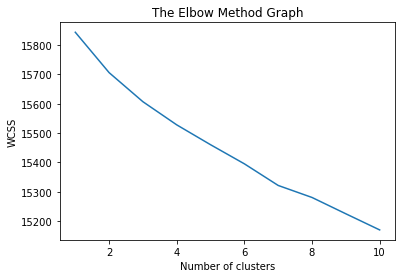

In [16]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [145]:
nlp2 = NLPPipe(vectorizer=TfidfVectorizer(stop_words=set(my_stop_words),max_features=250), 
              cleaning_function=clean, 
              tokenizer=TreebankWordTokenizer().tokenize, 
              stemmer=PorterStemmer())

nlp2.fit(corpus)
X2 = nlp.transform(corpus).toarray()
df2 = pd.DataFrame(X, columns = nlp.vectorizer.get_feature_names())
nlp2.fit(corpus)
vectors = nlp2.transform(corpus)

X2_data = vectors.todense()
X2_data.shape

(16451, 250)

In [19]:
wcss2 = []
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0)
    kmeans.fit(X2_data)

    wcss2.append(kmeans.inertia_)

In [23]:
nlp3 = NLPPipe(vectorizer=TfidfVectorizer(stop_words=set(my_stop_words),max_features=2500), 
              cleaning_function=clean, 
              tokenizer=TreebankWordTokenizer().tokenize, 
              stemmer=PorterStemmer())

nlp3.fit(corpus)
X3 = nlp.transform(corpus).toarray()
df3 = pd.DataFrame(X, columns = nlp.vectorizer.get_feature_names())
nlp3.fit(corpus)
vectors = nlp3.transform(corpus)

X3_data = vectors.todense()
X3_data.shape

(16451, 2500)

In [24]:
wcss3 = []
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0)
    kmeans.fit(X3_data)

    wcss3.append(kmeans.inertia_)

In [29]:
nlp4 = NLPPipe(vectorizer=TfidfVectorizer(stop_words=set(my_stop_words),max_features=1000), 
              cleaning_function=clean, 
              tokenizer=TreebankWordTokenizer().tokenize, 
              stemmer=PorterStemmer())

nlp4.fit(corpus)
X4 = nlp.transform(corpus).toarray()
df4 = pd.DataFrame(X, columns = nlp.vectorizer.get_feature_names())
nlp4.fit(corpus)
vectors = nlp4.transform(corpus)

X4_data = vectors.todense()
X4_data.shape

(16451, 1000)

In [34]:
wcss4 = []
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0)
    kmeans.fit(X4_data)

    wcss4.append(kmeans.inertia_)

In [33]:
wcss3 = wcss3[0:10]
len(wcss3)

10

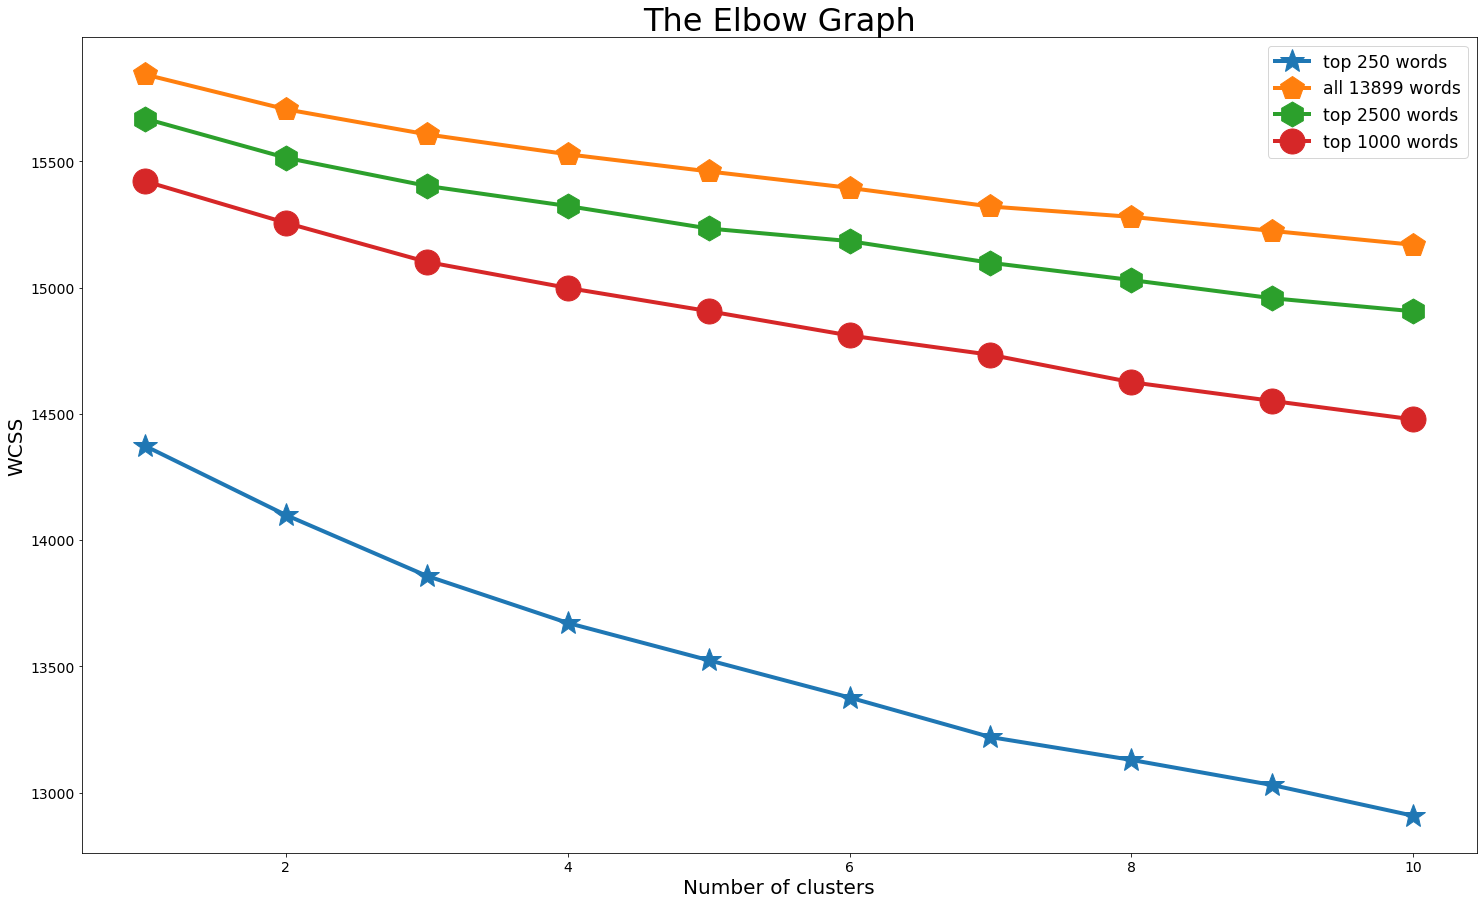

In [84]:
plt.figure(figsize=(25,15))
plt.plot(range(1,11),wcss2, '-*', label = 'top 250 words', linewidth = 4, markersize=25)
plt.plot(range(1, 11), wcss, '-p', label = 'all 13899 words', linewidth = 4,markersize=25)
plt.plot(range(1,11), wcss3, '-h', label = 'top 2500 words', linewidth = 4,markersize=25)
plt.plot(range(1,11), wcss4, '-o', label = 'top 1000 words', linewidth = 4,markersize=25)
plt.title('The Elbow Graph', fontsize=32)
plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('WCSS', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize='xx-large')
plt.savefig('elbow.png')

In [28]:
import seaborn as sns

In [41]:
cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [47]:
ind = ['All 13899 words', 'Top 2500 words', 'Top 1000 words', 'Top 250 words']

In [45]:
df = pd.DataFrame([wcss, wcss3, wcss4, wcss2], columns = cols)

In [50]:
df = df.set_axis(ind, inplace=False).set_axis(cols, axis=1, inplace=False)


In [51]:
df

,1,2,3,4,5,6,7,8,9,10
All 13899 words,15844.180750,15706.309471,15607.014722,15528.053223,15460.272180,15395.052115,15321.232792,15280.232797,15224.540099,15169.492899
Top 2500 words,15669.336447,15514.280564,15402.863774,15323.169882,15234.103978,15184.119457,15098.234283,15029.945048,14957.852301,14906.191941
Top 1000 words,15421.437859,15256.639204,15101.776257,14998.710624,14906.605318,14810.390782,14733.828999,14625.253460,14551.093906,14477.899596
Top 250 words,14373.011026,14099.175731,13858.127240,13671.794017,13524.150157,13376.382091,13219.676450,13129.226984,13029.710907,12908.094122


In [148]:
kmeans = KMeans(n_clusters=7, init ='k-means++', max_iter=300, n_init=10,random_state=0)
clusters = kmeans.fit_predict(X_data)

In [89]:
y_kmeans

array([6, 5, 5, ..., 4, 4, 6], dtype=int32)

In [120]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:])
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:]))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(22, 10))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot', fontsize=32)

    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot', fontsize=32)

    plt.savefig('PCA tsne 2.png')

In [102]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm


In [129]:
def get_top_keywords(df, clusters, labels, n_terms):
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))


In [152]:
df2 = pd.DataFrame(X_data, columns = nlp.vectorizer.get_feature_names())
topics = list(df2.columns)

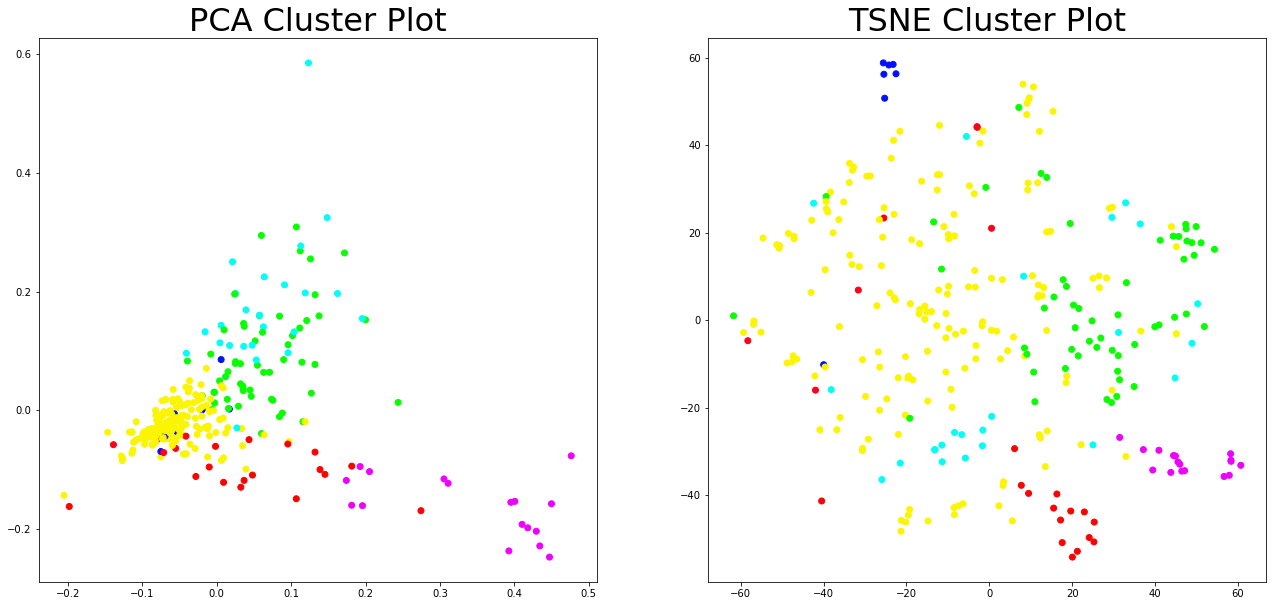

In [151]:
plot_tsne_pca(X_data, clusters)